<a href="https://colab.research.google.com/github/agimu/TeslaStockPred/blob/main/Tesla_StockPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing all the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

data = pd.read_csv("TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3026,2022-07-07,701.760010,736.090027,696.630005,733.630005,733.630005,27310200
3027,2022-07-08,727.000000,764.940002,723.479980,752.289978,752.289978,33343700
3028,2022-07-11,756.309998,759.190002,700.880005,703.030029,703.030029,33080400
3029,2022-07-12,710.539978,719.320007,685.109985,699.210022,699.210022,29310300
3030,2022-07-13,676.500000,726.179871,675.109985,711.119995,711.119995,32319133


## Plotting all the closing values at the end of each day

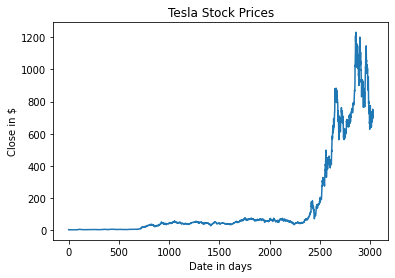

In [ ]:
close = data['Close']
ax = close.plot(title='Tesla Stock Prices')
ax.set_xlabel('Date in days')
ax.set_ylabel('Close in $')
plt.show()

## Extracting date and the closing value on that particular day 

In [ ]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
date_close = data[["Date", "Close"]]

In [ ]:
date_close.head()

,Date,Close
0,2010-06-29,4.778
1,2010-06-30,4.766
2,2010-07-01,4.392
3,2010-07-02,3.840
4,2010-07-06,3.222


## Renaming the columns to fit them in the model

In [ ]:
data1 = data1.rename(columns={"Date" : "ds", "Close" : "y" })

## Fitting the model and predicting the closing values for the next 365 days

In [ ]:
model = Prophet()
model.fit(data1)
predict = model.make_future_dataframe(periods=365)
forecast = model.predict(predict)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

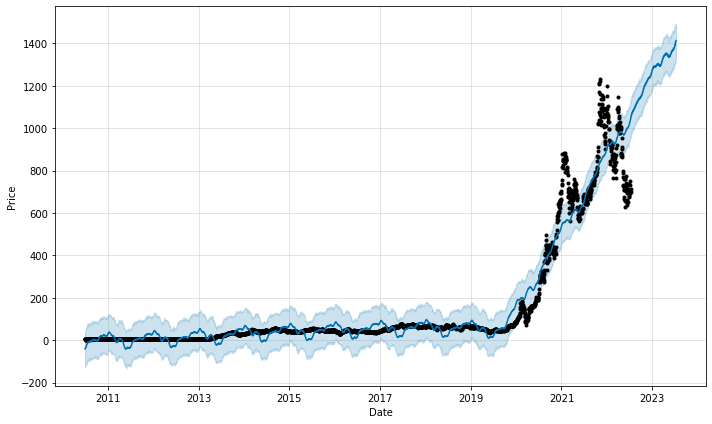

In [ ]:
graph = model.plot(forecast, xlabel="Date", ylabel="Price")

It can be observed clearly that the prediction for the stock prices rise when considering the company's enitre history to train the model

In [ ]:
print (data1.count())
print (data1.isnull().sum())

ds    3031
y     3031
dtype: int64
ds    0
y     0
dtype: int64


## Halving the dataset to consider the stock prices from the year 2016 where Tesla actually started going up in stock prices



In [ ]:
data2 = data1[1501:]

In [ ]:
data2.head()

,ds,y
1501,2016-06-15,43.540001
1502,2016-06-16,43.585999
1503,2016-06-17,43.094002
1504,2016-06-20,43.939999
1505,2016-06-21,43.922001


In [ ]:
data2.tail()

,ds,y
3026,2022-07-07,733.630005
3027,2022-07-08,752.289978
3028,2022-07-11,703.030029
3029,2022-07-12,699.210022
3030,2022-07-13,711.119995


## Predicting the stock prices with the halved dataset

In [ ]:
model1 = Prophet()
model1.fit(data2)
predict = model1.make_future_dataframe(periods=365)
forecast = model1.predict(predict)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1890,2023-07-09,1063.575381,940.829033,1193.046474
1891,2023-07-10,1070.518320,934.093687,1188.366874
1892,2023-07-11,1070.564723,948.857454,1194.456397
1893,2023-07-12,1073.063127,949.932041,1197.895600
1894,2023-07-13,1073.986993,934.805415,1201.204000


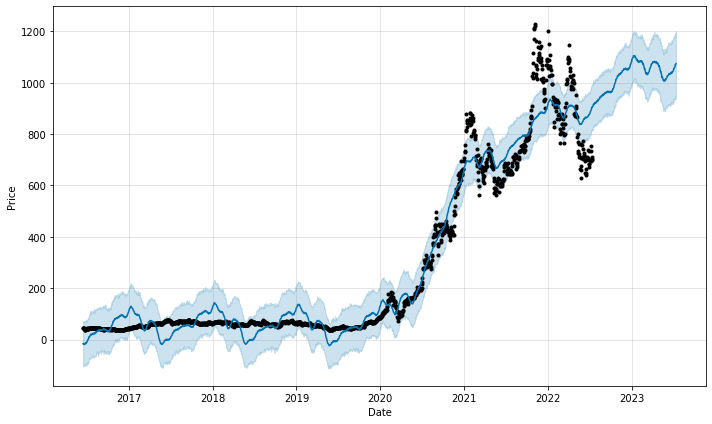

In [ ]:
graph = model1.plot(forecast, xlabel="Date", ylabel="Price")

When the stock price data from 2016 is considered the values of the predictions do not seem to go to high as the previous model